# **DelhiVery - Feature Engineering**

In [16]:
%pip install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=e4e2dcedf4303b33f8886bdd6bba4541996880a4f1d412552f22a8a3bff4fd75
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\40\b3\0f\a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Basic data cleaning and exploration:

In [3]:
df=pd.read_csv("delhivery1.csv")

In [4]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [5]:
df.shape

(144867, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [7]:
# removing unknown columns

df.drop(columns=['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'], inplace=True)

In [8]:
#Converting data type of categorical columns
df['route_type'] = df['route_type'].astype('category')

# Data Cleaning & Feature Extraction

In [9]:
df.loc[df.trip_uuid=='trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434


## Merging Rows by Trip ID

In [10]:
df['segment_id'] = df['trip_uuid']+df['source_center']+df['destination_center']
df['segment_actual_time'] = df.groupby('segment_id')['segment_actual_time'].cumsum()
df['segment_osrm_time'] = df.groupby('segment_id')['segment_osrm_time'].cumsum()
df['segment_osrm_distance'] = df.groupby('segment_id')['segment_osrm_distance'].cumsum()

In [11]:
df.loc[df['trip_uuid']=='trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_id
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320IND388121AAAIND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,24.0,20.0,21.7243,trip-153741093647649320IND388121AAAIND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,40.0,27.0,32.5395,trip-153741093647649320IND388121AAAIND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,61.0,39.0,45.5619,trip-153741093647649320IND388121AAAIND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,67.0,44.0,49.4772,trip-153741093647649320IND388121AAAIND388620AAB
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171,trip-153741093647649320IND388620AABIND388320AAA
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,18.045481,44.0,17.0,21.2890,43.0,17.0,21.2890,trip-153741093647649320IND388620AABIND388320AAA
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,28.061896,65.0,29.0,35.8252,64.0,28.0,35.8252,trip-153741093647649320IND388620AABIND388320AAA
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,38.939167,76.0,39.0,47.1900,74.0,38.0,47.1900,trip-153741093647649320IND388620AABIND388320AAA
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,100.0,44.0,53.2334,trip-153741093647649320IND388620AABIND388320AAA


In [12]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_id'],
      dtype='object')

In [13]:
merge_segment = {'trip_creation_time':'first',
              'route_schedule_uuid':'first',
              'route_type':'first',
              'trip_uuid':'first',
              'source_center':'first',
              'source_name':'first',
              'destination_center':'last',
              'destination_name':'last',
              'od_start_time':'first',
              'od_end_time':'last',
              'start_scan_to_end_scan':'last',
              'actual_distance_to_destination':'last',
              'actual_time':'last',
              'osrm_time':'last',
              'osrm_distance':'last',
              'segment_actual_time':'last',
              'segment_osrm_time':'last',
              'segment_osrm_distance':'last'
}

In [14]:
segment_df = df.sort_values(['segment_id','actual_time']).groupby('segment_id').agg(merge_segment).reset_index()
segment_df.head()

,segment_id,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748IND209304AAAIND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748IND462022AAAIND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164IND561203AABIND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164IND572101AAAIND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517IND000000ACBIND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408


In [15]:
segment_df.loc[segment_df['trip_uuid']=='trip-153741093647649320']

,segment_id,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
10374,trip-153741093647649320IND388121AAAIND388620AAB,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,67.0,44.0,49.4772
10375,trip-153741093647649320IND388620AABIND388320AAA,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,100.0,44.0,53.2334


In [16]:
merge_trip = {'trip_creation_time':'first',
              'route_schedule_uuid':'first',
              'route_type':'first',
              'source_center':'first',
              'source_name':'first',
              'destination_center':'last',
              'destination_name':'last',
              'od_start_time':'first',
              'od_end_time':'last',
              'start_scan_to_end_scan':'sum',
              'actual_distance_to_destination':'sum',
              'actual_time':'sum',
              'osrm_time':'sum',
              'osrm_distance':'sum',
              'segment_actual_time':'sum',
              'segment_osrm_time':'sum',
              'segment_osrm_distance':'sum'}

In [17]:
trip_df = segment_df.sort_values(['trip_uuid','od_start_time']).groupby('trip_uuid').agg(merge_trip).reset_index()
trip_df.head()

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


In [18]:
trip_df.shape

(14817, 18)

### 1. Handle missing values in the data.

In [19]:
trip_df.isna().sum()

trip_uuid                          0
trip_creation_time                 0
route_schedule_uuid                0
route_type                         0
source_center                      0
source_name                       10
destination_center                 0
destination_name                   8
od_start_time                      0
od_end_time                        0
start_scan_to_end_scan             0
actual_distance_to_destination     0
actual_time                        0
osrm_time                          0
osrm_distance                      0
segment_actual_time                0
segment_osrm_time                  0
segment_osrm_distance              0
dtype: int64

In [20]:
trip_df.dropna(inplace=True)
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14800 entries, 0 to 14816
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   trip_uuid                       14800 non-null  object  
 1   trip_creation_time              14800 non-null  object  
 2   route_schedule_uuid             14800 non-null  object  
 3   route_type                      14800 non-null  category
 4   source_center                   14800 non-null  object  
 5   source_name                     14800 non-null  object  
 6   destination_center              14800 non-null  object  
 7   destination_name                14800 non-null  object  
 8   od_start_time                   14800 non-null  object  
 9   od_end_time                     14800 non-null  object  
 10  start_scan_to_end_scan          14800 non-null  float64 
 11  actual_distance_to_destination  14800 non-null  float64 
 12  actual_time            

In [21]:
trip_df.isna().sum()

trip_uuid                         0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

## **Feature Extraction**

In [22]:
trip_df.destination_name.value_counts()

destination_name
Gurgaon_Bilaspur_HB (Haryana)        813
Bangalore_Nelmngla_H (Karnataka)     628
Bhiwandi_Mankoli_HB (Maharashtra)    573
Chandigarh_Mehmdpur_H (Punjab)       431
Hyderabad_Shamshbd_H (Telangana)     400
                                    ... 
Bolpur_WebelDPP_D (West Bengal)        1
Bhandara_KaremDPP_D (Maharashtra)      1
Shirdi_SaiBansi_D (Maharashtra)        1
Sullia_Srirampt_D (Karnataka)          1
Jaipur_Central_D_1 (Rajasthan)         1
Name: count, Length: 949, dtype: int64

In [23]:
def extract_state(a):
  return a.split('(')[1][:-1]
trip_df['destination_state'] = trip_df.destination_name.apply(extract_state)
trip_df.destination_state.value_counts()

destination_state
Maharashtra               2591
Karnataka                 2275
Haryana                   1667
Tamil Nadu                1072
Telangana                  838
Gujarat                    746
Uttar Pradesh              732
West Bengal                708
Punjab                     693
Delhi                      675
Rajasthan                  523
Andhra Pradesh             414
Bihar                      363
Madhya Pradesh             337
Kerala                     273
Assam                      234
Jharkhand                  168
Orissa                     119
Uttarakhand                113
Goa                         65
Chhattisgarh                43
Himachal Pradesh            40
Chandigarh                  29
Arunachal Pradesh           23
Dadra and Nagar Haveli      17
Jammu & Kashmir             15
Pondicherry                 10
Meghalaya                    8
Mizoram                      6
Nagaland                     1
Tripura                      1
Daman & Diu          

In [24]:
#extracting city
def extract_city(a):
  if '_' not in a:
    return a.split(' ')[0]
  else:
    return a.split('_')[0]

trip_df['destination_city'] = trip_df.destination_name.apply(extract_city)
trip_df['destination_city']

0            Gurgaon
1         Chikblapur
2         Chandigarh
3             Mumbai
4            Bellary
            ...     
14812     Chandigarh
14813      Faridabad
14814         Kanpur
14815    Tirunelveli
14816        Bellary
Name: destination_city, Length: 14800, dtype: object

In [25]:
#Extracting state and city from source_name
trip_df['source_state'] = trip_df.source_name.apply(extract_state)
trip_df['source_city'] = trip_df.source_name.apply(extract_city)

In [35]:
trip_df[['destination_name','destination_state','destination_city','source_name','source_state','source_city']].sample(10)

,destination_name,destination_state,destination_city,source_name,source_state,source_city
6069,Bengaluru_KGAirprt_HB (Karnataka),Karnataka,Bengaluru,Bangalore_Nelmngla_H (Karnataka),Karnataka,Bangalore
11131,Ajmer_FoySGRRD_I (Rajasthan),Rajasthan,Ajmer,Ajmer_FoySGRRD_I (Rajasthan),Rajasthan,Ajmer
14227,Bhiwandi_Mankoli_HB (Maharashtra),Maharashtra,Bhiwandi,Bhiwandi_Mankoli_HB (Maharashtra),Maharashtra,Bhiwandi
13727,Delhi_Airport_H (Delhi),Delhi,Delhi,Gurgaon_Bilaspur_HB (Haryana),Haryana,Gurgaon
1909,Mumbai_Chndivli_PC (Maharashtra),Maharashtra,Mumbai,Mumbai_MaladWest_CP (Maharashtra),Maharashtra,Mumbai
12467,Ludhiana_MilrGanj_HB (Punjab),Punjab,Ludhiana,Ludhiana_GillChwk_DC (Punjab),Punjab,Ludhiana
11412,Bengaluru_Peenya_IP (Karnataka),Karnataka,Bengaluru,Bengaluru_Bomsndra_HB (Karnataka),Karnataka,Bengaluru
3847,Dibrugarh_Bokule_H (Assam),Assam,Dibrugarh,Tezu_Farmnala_D (Arunachal Pradesh),Arunachal Pradesh,Tezu
3733,Bengaluru_Hoodi_IP (Karnataka),Karnataka,Bengaluru,Bengaluru_Bomsndra_HB (Karnataka),Karnataka,Bengaluru
7971,Panaji Goa (Goa),Goa,Panaji,Goa_ZuariNgr_IP (Goa),Goa,Goa


In [37]:
#Extracting datetime features from trip_creation_date
trip_df['trip_creation_time']=pd.to_datetime(trip_df['trip_creation_time'])
trip_df['trip_year']=trip_df['trip_creation_time'].dt.year
trip_df['trip_month']=trip_df['trip_creation_time'].dt.month
trip_df['trip_day'] = trip_df['trip_creation_time'].dt.day
trip_df['trip_hour'] = trip_df['trip_creation_time'].dt.hour
trip_df['trip_dayofweek']=trip_df['trip_creation_time'].dt.day_of_week

In [38]:
trip_df[['trip_creation_time','trip_year','trip_month','trip_day','trip_hour','trip_dayofweek']].sample(10)

,trip_creation_time,trip_year,trip_month,trip_day,trip_hour,trip_dayofweek
4399,2018-09-18 01:35:34.596089,2018,9,18,1,1
1803,2018-09-14 09:21:52.982421,2018,9,14,9,4
12049,2018-09-29 03:46:05.946108,2018,9,29,3,5
9927,2018-09-25 23:15:41.664489,2018,9,25,23,1
11798,2018-09-28 21:28:39.042117,2018,9,28,21,4
4321,2018-09-17 23:48:27.866108,2018,9,17,23,0
956,2018-09-13 06:08:54.650964,2018,9,13,6,3
12115,2018-09-29 06:23:50.249587,2018,9,29,6,5
5628,2018-09-19 20:19:33.123694,2018,9,19,20,2
6255,2018-09-20 17:30:07.171675,2018,9,20,17,3


In [40]:
#Calculate trip_time
trip_df['od_end_time']=pd.to_datetime(trip_df['od_end_time'])
trip_df['od_start_time']=pd.to_datetime(trip_df['od_start_time'])
trip_df['trip_time_mins'] = (trip_df['od_end_time'] - trip_df['od_start_time']).dt.total_seconds()/(60)
trip_df['trip_time'] = trip_df['od_end_time'] - trip_df['od_start_time']

## Handling Outliers

In [41]:
numeric_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance']

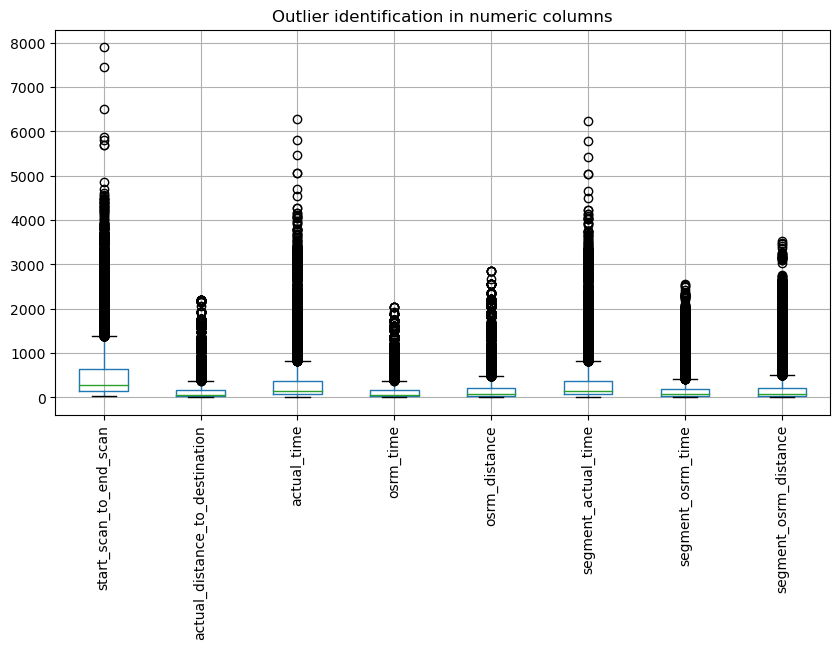

In [42]:
trip_df[numeric_cols].boxplot(figsize=(10,5))
plt.xticks(rotation=90)
plt.title('Outlier identification in numeric columns')
plt.show();

In [43]:
#Calculating IQR (Inter Quartile Range)
q1 = trip_df[numeric_cols].quantile(0.25)
q3 = trip_df[numeric_cols].quantile(0.75)

iqr = q3-q1
iqr

start_scan_to_end_scan            489.000000
actual_distance_to_destination    141.919184
actual_time                       303.000000
osrm_time                         139.250000
osrm_distance                     177.857750
segment_actual_time               301.000000
segment_osrm_time                 155.000000
segment_osrm_distance             186.299975
dtype: float64

In [44]:
trip_df = trip_df[~((trip_df[numeric_cols]<q1-(1.5*iqr)) | (trip_df[numeric_cols]>q3+(1.5*iqr))).any(axis=1)].reset_index()

In [45]:
#Checking the number of rows after removing outliers
trip_df.shape

(12744, 30)

# Exploratory Data Analysis

In [46]:
#Statistical Summary

trip_df[numeric_cols].describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,12744.000000,12744.000000,12744.000000,12744.000000,12744.000000,12744.000000,12744.000000,12744.000000
mean,322.166824,72.840581,178.612837,78.992546,92.396940,176.948682,86.527150,98.697578
std,257.550322,72.611124,159.187899,72.898179,90.244340,158.133558,80.244315,95.577469
min,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900
25%,136.000000,21.403779,61.000000,27.000000,28.357800,60.000000,28.000000,29.464775
50%,234.000000,38.657143,115.000000,50.000000,48.619050,114.000000,53.000000,54.226200
75%,427.000000,103.167305,254.000000,111.000000,132.065825,251.000000,127.000000,141.580900
max,1366.000000,373.441224,820.000000,376.000000,474.133700,818.000000,417.000000,497.792900


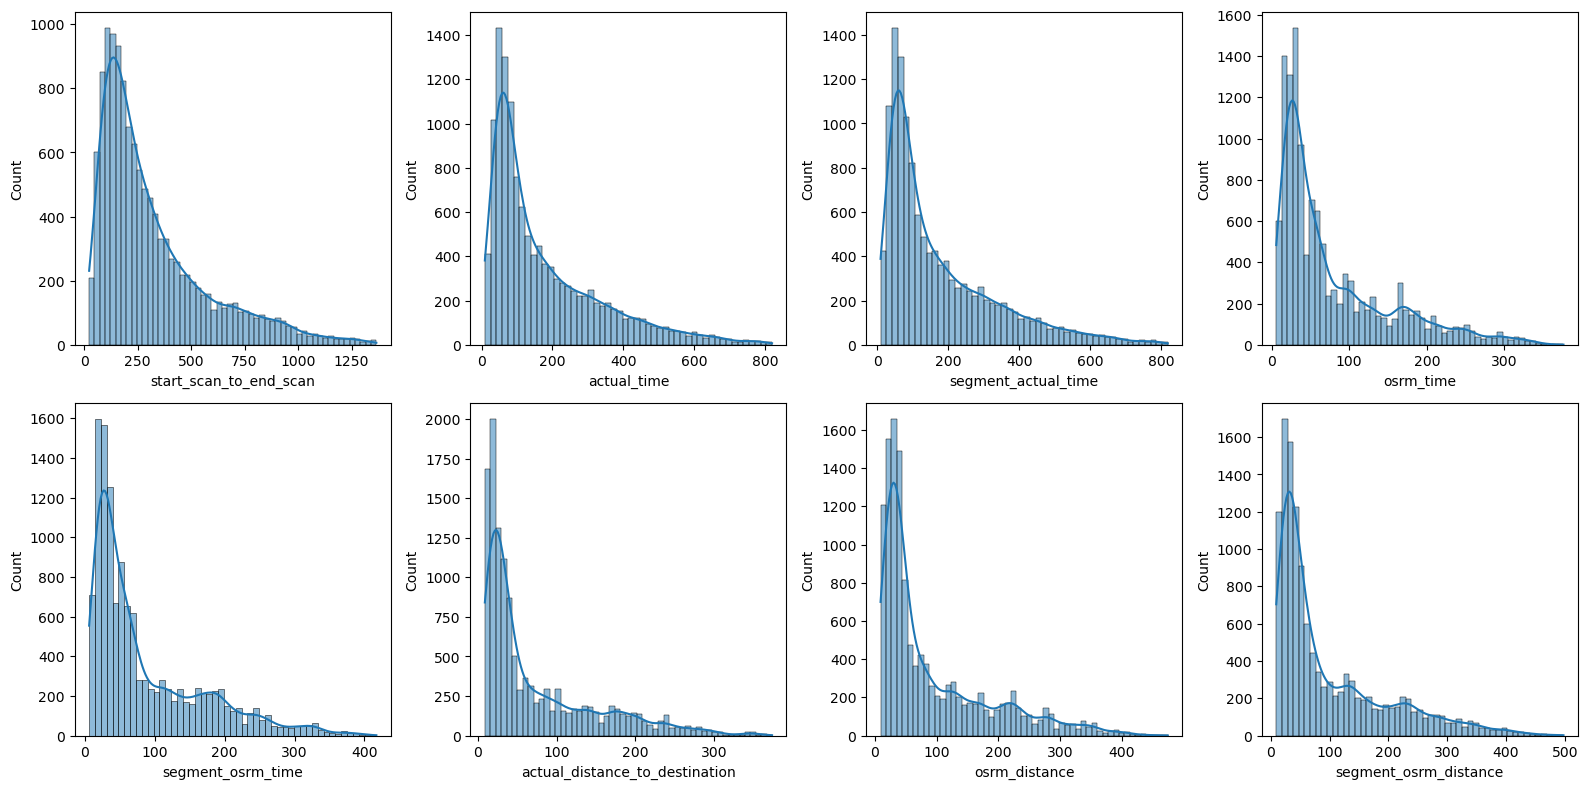

In [47]:
#Distribution plots of continuous features

fig, ax = plt.subplots(2,4, figsize=(16,8))

sns.histplot(data=trip_df['start_scan_to_end_scan'], kde=True, ax=ax[0,0])
sns.histplot(data=trip_df['actual_time'], kde=True, ax=ax[0,1])
sns.histplot(data=trip_df['segment_actual_time'], kde=True, ax=ax[0,2])
sns.histplot(data=trip_df['osrm_time'], kde=True, ax=ax[0,3])
sns.histplot(data=trip_df['segment_osrm_time'], kde=True, ax=ax[1,0])
sns.histplot(data=trip_df['actual_distance_to_destination'], kde=True, ax=ax[1,1])
sns.histplot(data=trip_df['osrm_distance'], kde=True, ax=ax[1,2])
sns.histplot(data=trip_df['segment_osrm_distance'], kde=True, ax=ax[1,3])

plt.tight_layout()
plt.show()